In [58]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
from utils.draw import draw_squares
from utils.square import SquareDataset

# Input
x and y represent our variables! They contain 10 examples of the 9 square images (x) and their corresponding 10 answers (y) in vector form.

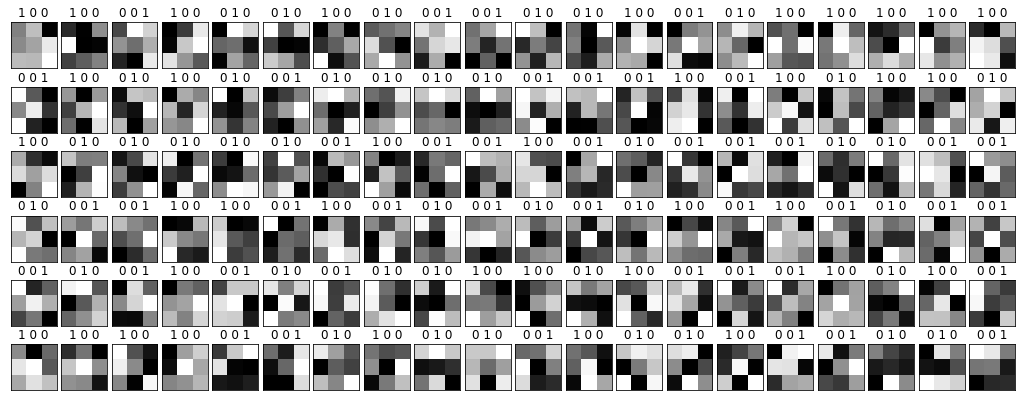

In [59]:
dataset = SquareDataset(120)
draw_squares(dataset)

In [60]:
x, y = dataset[0]
x /= 255

In [61]:
w = torch.rand(9, 3, requires_grad=True)
b = torch.rand(1, 3, requires_grad=True)

w, b

(tensor([[0.6227, 0.3227, 0.4643],
         [0.3611, 0.9995, 0.0182],
         [0.3490, 0.9018, 0.8230],
         [0.7947, 0.1129, 0.3568],
         [0.5496, 0.5419, 0.1172],
         [0.6395, 0.1020, 0.4043],
         [0.4774, 0.1140, 0.7526],
         [0.7378, 0.9500, 0.2833],
         [0.8090, 0.5638, 0.9218]], requires_grad=True),
 tensor([[0.8905, 0.6296, 0.0863]], requires_grad=True))

In [62]:
h = x.view(1, 9).mm(w) + b
h

tensor([[2.8305, 2.6617, 1.8228]], grad_fn=<AddBackward0>)

In [63]:
loss = ((h - y)**2).mean()
loss

tensor(4.5861, grad_fn=<MeanBackward1>)

In [64]:
loss.backward()

In [65]:
import re
# h = x.view(1, 9).mm(w) + b
# loss = ((h - y)**2).mean()
def print_graph(g, ops=[], level=0):
    if g == None:
        ops.append((level, 'C'))
        print('{}. {}{}{}'.format(level, '-'*level*3, 'Constant', level))
        return ops
    elif hasattr(g, 'variable'):
        ops.append((level, 'V'))
        print('{}. {}{}{}'.format(level, '-'*level*3, 'Variable', level))
    else:
        name = g.name()
        m = name[:re.search(r'^([^A-Z]*[A-Z]){2}', name).span()[1]-1]
        ops.append((level, m))
        print('{}. {}{}{}'.format(level, '-'*level*3, m, level))
        
    for subg in g.next_functions:
        print_graph(subg[0], ops, level+1)

o = []
print_graph(loss.grad_fn, o, 0)


0. Mean0
1. ---Pow1
2. ------Sub2
3. ---------Add3
4. ------------Mm4
5. ---------------Constant5
5. ---------------Variable5
4. ------------Variable4
3. ---------Constant3


In [66]:
graph = nx.DiGraph()
for item in o:
    parent = '{1}{0}'.format(*item)
    children = [(parent, '{1}{0}'.format(*tps)) for tps in o if tps[0] == item[0]+1]
    graph.add_edges_from(children)
    if len(children) == 0:
        break

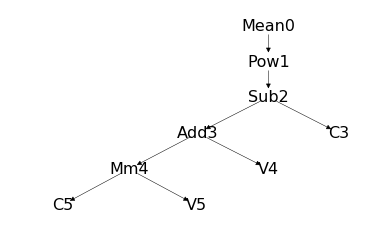

In [67]:
plt.plot()
pos = nx.nx_pydot.graphviz_layout(graph, prog='dot')
nx.draw(graph, pos, font_size=16, with_labels=True, node_color='w', width=.5, linewidths=.5)

In [68]:
b.grad

tensor([[1.2203, 1.7745, 1.2152]])

In [69]:
w

tensor([[0.6227, 0.3227, 0.4643],
        [0.3611, 0.9995, 0.0182],
        [0.3490, 0.9018, 0.8230],
        [0.7947, 0.1129, 0.3568],
        [0.5496, 0.5419, 0.1172],
        [0.6395, 0.1020, 0.4043],
        [0.4774, 0.1140, 0.7526],
        [0.7378, 0.9500, 0.2833],
        [0.8090, 0.5638, 0.9218]], requires_grad=True)